# Import Library And Data-Set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'C:\Users\hp\Downloads\book.csv')
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
data.shape

(2000, 11)

In [6]:
data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [10]:
#Generating list of Purchased and Not Purchased 
zero = []
one = []
for i in data.columns:
    zero.append(list(data[i].value_counts())[0])
    one.append(list(data[i].value_counts())[1])

In [11]:
count = pd.DataFrame([zero,one], columns=data.copy().columns)
count.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
1,846,495,862,564,429,482,552,227,74,97,217


In [12]:
#counting how many books are purchased
count.index = ['Not_Purchased', 'Purchased']
count

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
Not_Purchased,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
Purchased,846,495,862,564,429,482,552,227,74,97,217


In [13]:
print("Maximum purchased item:" ,count.idxmax(axis=1)[1],', Total Purchase: ',count.loc['Purchased'].max())
print("Minimum purchased item:" ,count.idxmax(axis=1)[0],', Total Purchase: ',count.loc['Not_Purchased'].max())

Maximum purchased item: CookBks , Total Purchase:  862
Minimum purchased item: ItalAtlas , Total Purchase:  1926


In [15]:
sorted_df = pd.DataFrame(count.sort_values(by = ['Purchased'], axis=1, ascending=False).transpose())
sorted_df

,Not_Purchased,Purchased
CookBks,1138,862
ChildBks,1154,846
DoItYBks,1436,564
GeogBks,1448,552
YouthBks,1505,495
ArtBks,1518,482
RefBks,1571,429
ItalCook,1773,227
Florence,1783,217
ItalArt,1903,97


In [16]:
#percentage of books purchased
# book/total_no._of_books
sorted_df['Purchased %']= sorted_df.Purchased/sum(sorted_df.Purchased)
sorted_df

,Not_Purchased,Purchased,Purchased %
CookBks,1138,862,0.177915
ChildBks,1154,846,0.174613
DoItYBks,1436,564,0.116409
GeogBks,1448,552,0.113932
YouthBks,1505,495,0.102167
ArtBks,1518,482,0.099484
RefBks,1571,429,0.088545
ItalCook,1773,227,0.046852
Florence,1783,217,0.044788
ItalArt,1903,97,0.020021


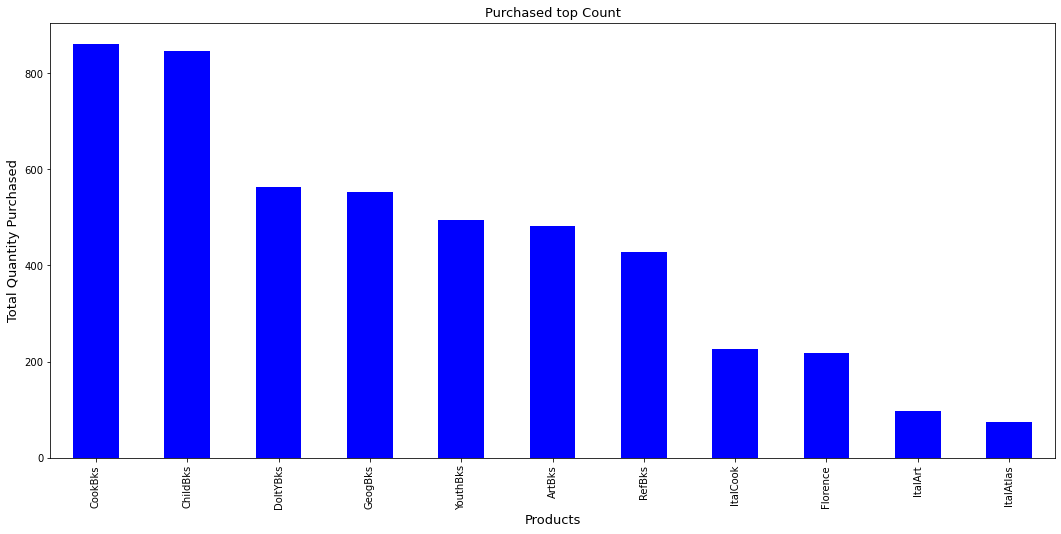

In [17]:
fig = plt.subplots(figsize=(18,8))
purchased = sorted_df.head(50).xs('Purchased' , axis=1)
purchased.plot(kind='bar', color = 'blue')
plt.title('Purchased top Count',fontsize=13)
plt.xlabel('Products', fontsize=13)
plt.ylabel('Total Quantity Purchased', fontsize=13)
plt.show()

# Apriori Algoritham

In [18]:
from mlxtend.frequent_patterns import apriori, association_rules
freq_items = apriori(data, min_support=0.05, use_colnames=True, max_len=3)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [19]:

# Rules by metrix : confidence
confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)

In [21]:
confidence_association.sort_values('confidence',ascending = False,inplace=True)
confidence_association.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
172,"(YouthBks, ItalCook)",(CookBks),0.0590,0.431,0.0590,1.0,2.320186,0.033571,inf
34,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf
106,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.0,2.320186,0.048365,inf
225,"(ItalCook, DoItYBks)",(CookBks),0.0585,0.431,0.0585,1.0,2.320186,0.033287,inf
246,"(ArtBks, ItalCook)",(CookBks),0.0565,0.431,0.0565,1.0,2.320186,0.032148,inf


In [22]:
# Rules by metrix : confidence
lift_association = association_rules(freq_items, metric='lift', min_threshold=0.2)

In [23]:
# Rules by metrix : confidence
lift_association = association_rules(freq_items, metric='lift', min_threshold=0.2)

In [24]:
lift_association.sort_values('lift',ascending = False,inplace=True)
lift_association.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
184,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
181,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
262,(ItalCook),"(ArtBks, CookBks)",0.1135,0.1670,0.0565,0.497797,2.980822,0.037545,1.658693
259,"(ArtBks, CookBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
265,"(GeogBks, CookBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025


# Eliminating Redundant rules

In [25]:
# Rules we got with 'confidence' as metrix
confredundancy = confidence_association.sort_values(by=['leverage','confidence'], axis=0, ascending=False).reset_index()
confredundancy = confredundancy.drop(['index'], axis=1)
confredundancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
...,...,...,...,...,...,...,...,...,...
274,(ItalCook),(DoItYBks),0.1135,0.2820,0.0585,0.515419,1.827725,0.026493,1.481691
275,"(ItalCook, CookBks)",(DoItYBks),0.1135,0.2820,0.0585,0.515419,1.827725,0.026493,1.481691
276,(DoItYBks),"(ItalCook, CookBks)",0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
277,(DoItYBks),(ItalCook),0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537


In [26]:
# Rules we got with 'lift' as metrix
liftredundancy = lift_association.sort_values(by=['leverage','confidence'], axis=0, ascending=False).reset_index()
liftredundancy = liftredundancy.drop(['index'], axis=1)
liftredundancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
...,...,...,...,...,...,...,...,...,...
289,(ItalCook),(DoItYBks),0.1135,0.2820,0.0585,0.515419,1.827725,0.026493,1.481691
290,(DoItYBks),(ItalCook),0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
291,(DoItYBks),"(ItalCook, CookBks)",0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
292,"(GeogBks, ItalCook)",(ChildBks),0.0640,0.4230,0.0525,0.820312,1.939273,0.025428,3.211130


# Finding the Unique Sets

In [27]:
unique_rules = liftredundancy.iloc[::1]
unique_rules.shape

(294, 9)

In [28]:
unique_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982


# Generated Rules analysis

In [29]:
#Rules sorted with respect to lift
top_sort = unique_rules[unique_rules['lift']>1.5]

In [30]:

top_sored = top_sort.sort_values(by='lift', ascending = False)
top_sort.reset_index(inplace=True)
top_sort = top_sort.drop(['index'],axis=1)
top_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982


In [31]:
x = top_sort[['antecedents','consequents']]

In [32]:
# top sorted Antecedents
item_list = []
for i in x.antecedents.to_list():
    for j in list(set(i)):
        item_list.append(j)

In [33]:
# top sorted consequents
item_list = []
for p in x.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)

In [34]:
#generating unique list of items (# without redundacy)
def unique(list1):
    # insert the list to the set 
    list_set = set(list1)
 
    # convert the set to the list 
    unique_list = (list(list_set))
 
    top_items =[]
    for m in unique_list:
        top_items.append(m)
 
    print(top_items)


# Concluding top_items and the shuffled combination of top lift result

In [35]:
unique(item_list)

['YouthBks', 'GeogBks', 'ChildBks', 'DoItYBks', 'RefBks', 'ArtBks', 'ItalCook', 'CookBks']


# Trying different values of Min_support, Metric, Max_len, and Min_thershold

In [36]:
frequent_books_s = apriori(data, min_support = 0.015, max_len = 3, use_colnames = True)
#sorting with respect to support
frequent_books_s.sort_values("support", ascending = False, inplace = True)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [38]:
#generating association rules
rules = association_rules(frequent_books_s, metric = "lift", min_threshold= 1)

In [39]:
#sorting rules with respect to lift
rules_r = rules.sort_values('lift', ascending = False).head(10)
rules_r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
748,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
753,(ItalAtlas),"(RefBks, ItalArt)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
738,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
739,(ItalArt),"(ArtBks, ItalAtlas)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
361,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
360,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
568,"(RefBks, ItalCook)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
573,(ItalAtlas),"(RefBks, ItalCook)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
749,"(RefBks, ItalAtlas)",(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
736,"(ItalArt, ArtBks)",(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547


In [40]:
## Min_support = 0.005, Max_len = 5, Lift, Min_threshold=1
frequent_books_2 = apriori(data, min_support = 0.005, max_len = 5, use_colnames = True)
rules2 = association_rules(frequent_books_2, metric = "lift", min_threshold= 1)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [41]:
## Min_support = 0.005, Max_len = 4, Lift, Min_threshold=1
frequent_books_3 = apriori(data, min_support = 0.005, max_len = 4, use_colnames = True)
rules3 = association_rules(frequent_books_3, metric = "lift", min_threshold= 1)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [42]:
## Min_support = 0.01, Max_len = 3, Lift, Min_threshold=1.5
frequent_books_4 = apriori(data, min_support = 0.01, max_len = 3, use_colnames = True)
rules4 = association_rules(frequent_books_4, metric = "lift", min_threshold= 1.5)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [43]:
## Min_support = 0.05, Max_len = 3, Confidence, Min_threshold = 0.8
frequent_books_5 = apriori(data, min_support = 0.05, max_len = 3, use_colnames = True)
rules5 = association_rules(frequent_books_5, metric = "confidence", min_threshold= 0.8)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [44]:
## Min_support = 0.1, Max_len = 3, Confidence, Min_threshold = 0.8
frequent_books_6 = apriori(data, min_support = 0.1, max_len = 3, use_colnames = True)
rules6 = association_rules(frequent_books_6, metric = "confidence", min_threshold= 0.8)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [45]:
# Generating list for support and confidence
support=rules['support']
confidence=rules['confidence']

Text(0, 0.5, 'Support')

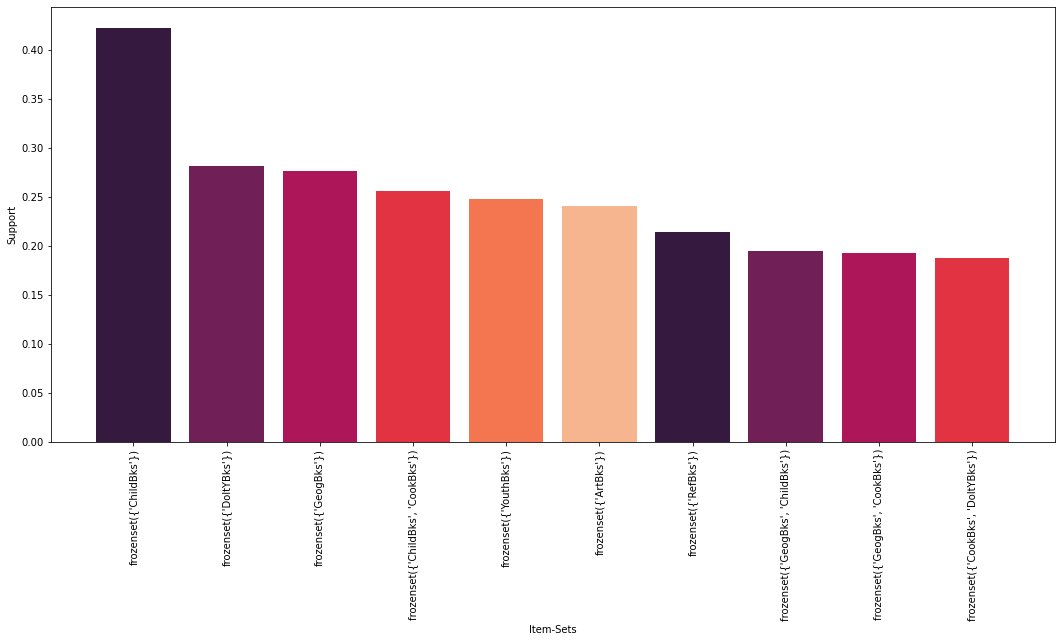

In [46]:
#frequent_books_s
plt.figure(figsize = (18,8))
plt.bar(x=list(range(1,11)),height=frequent_books_s.support[1:11], color = sns.color_palette ('rocket'))
plt.xticks(list(range(1,11)),frequent_books_s.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets')
plt.ylabel('Support')

Text(0, 0.5, 'Support')

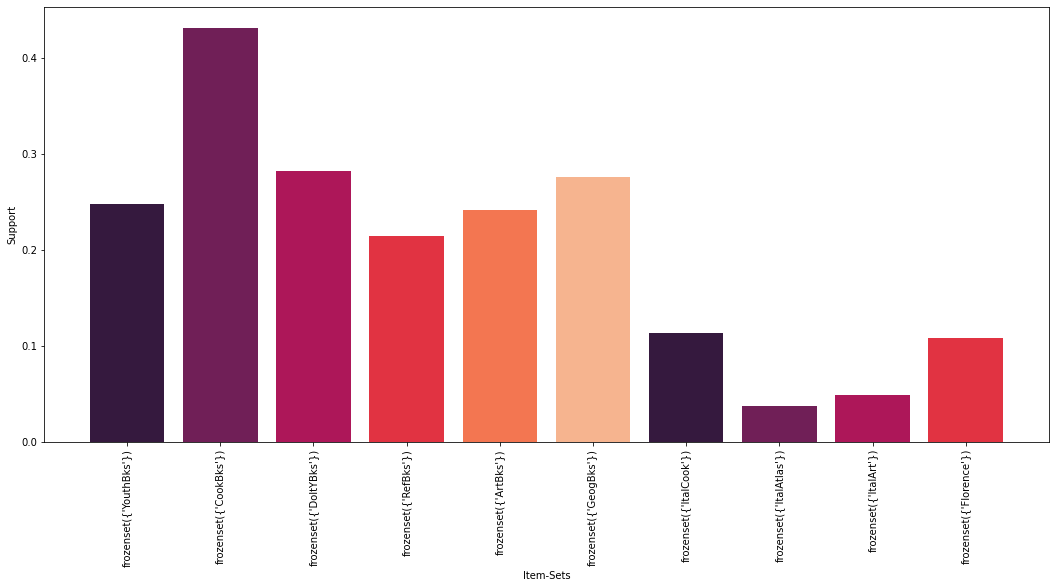

In [47]:
#frequent_books_2
plt.figure(figsize = (18,8))
plt.bar(x=list(range(1,11)),height=frequent_books_2.support[1:11],color = sns.color_palette ('rocket'))
plt.xticks(list(range(1,11)),frequent_books_2.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets')
plt.ylabel('Support')

Text(0, 0.5, 'Support')

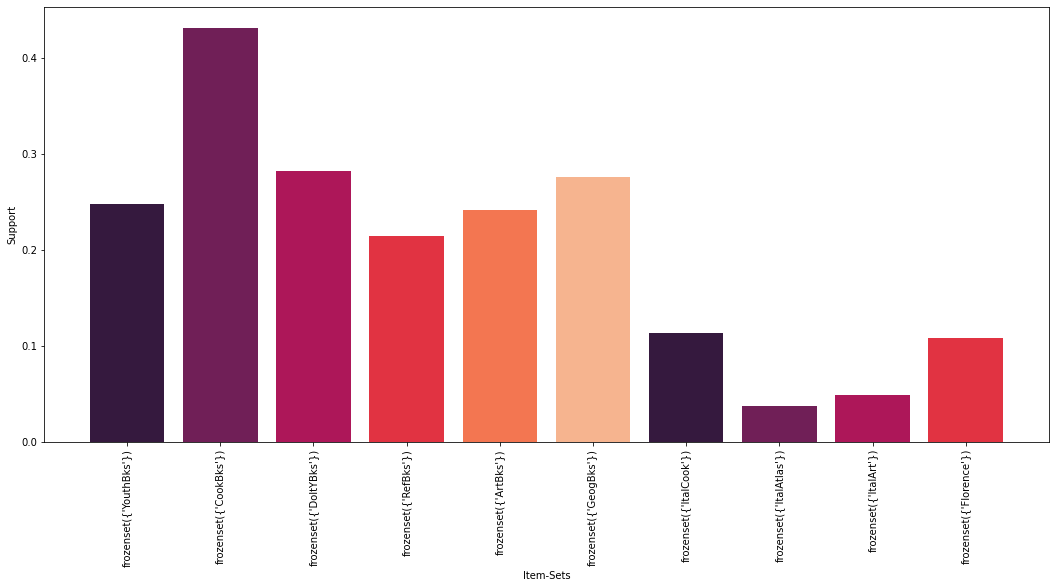

In [48]:
#frequent_books_3
plt.figure(figsize = (18,8))
plt.bar(x=list(range(1,11)),height=frequent_books_3.support[1:11],color = sns.color_palette ('rocket'))
plt.xticks(list(range(1,11)),frequent_books_3.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets')
plt.ylabel('Support')

Text(0, 0.5, 'Support')

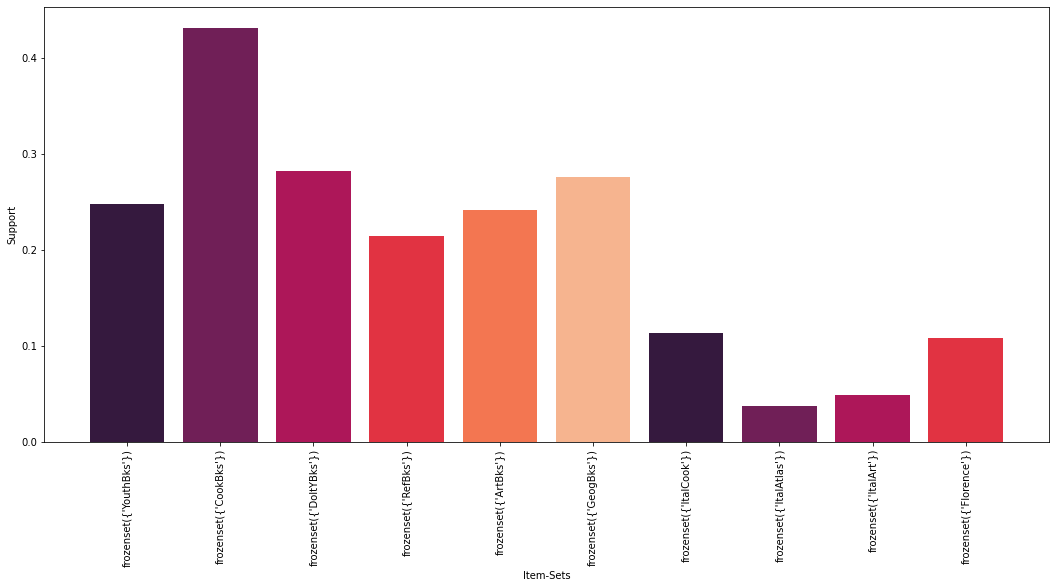

In [49]:
#frequent_books_4
plt.figure(figsize = (18,8))
plt.bar(x=list(range(1,11)),height=frequent_books_4.support[1:11],color = sns.color_palette ('rocket'))
plt.xticks(list(range(1,11)),frequent_books_4.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets')
plt.ylabel('Support')

Text(0, 0.5, 'Support')

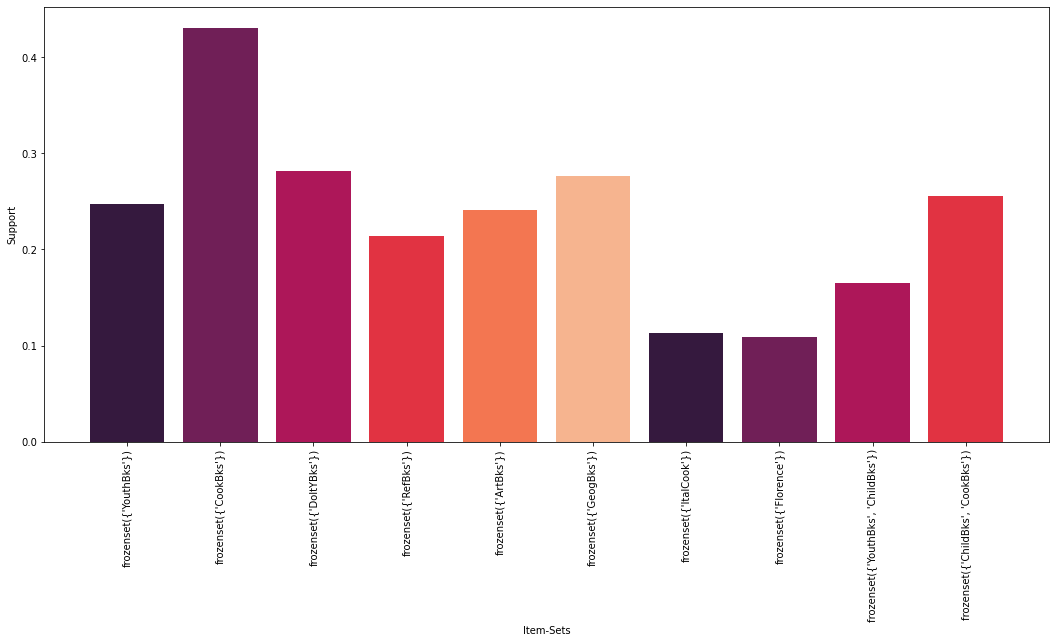

In [50]:
#frequent_books_5
plt.figure(figsize = (18,8))
plt.bar(x=list(range(1,11)),height=frequent_books_5.support[1:11],color = sns.color_palette ('rocket'))
plt.xticks(list(range(1,11)),frequent_books_5.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets')
plt.ylabel('Support')

Text(0, 0.5, 'Support')

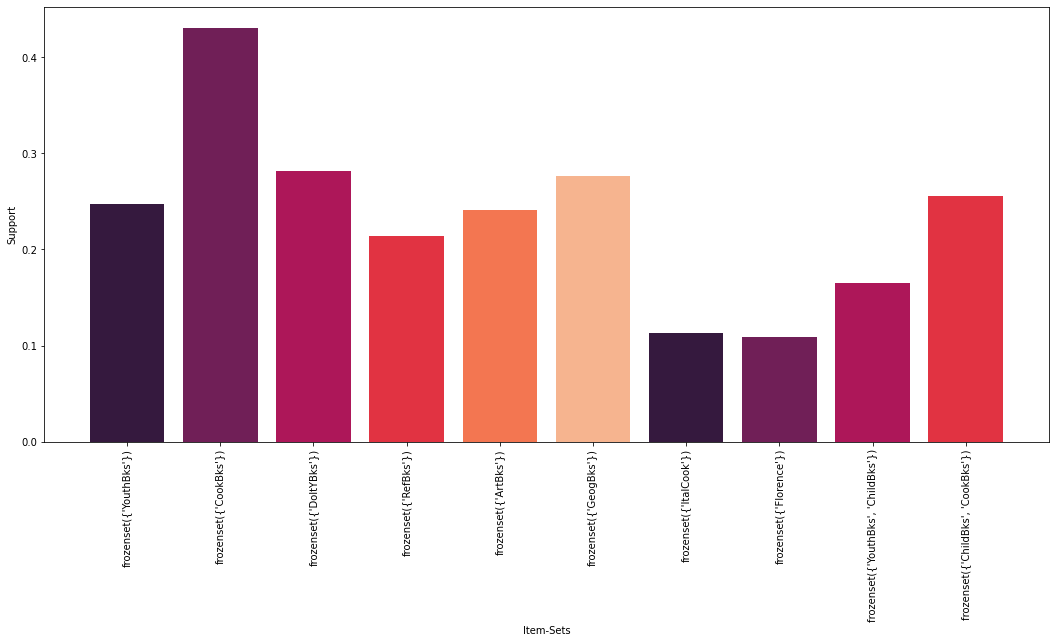

In [51]:
#frequent_books_6
plt.figure(figsize = (18,8))
plt.bar(x=list(range(1,11)),height=frequent_books_6.support[1:11],color = sns.color_palette ('rocket'))
plt.xticks(list(range(1,11)),frequent_books_6.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets')
plt.ylabel('Support')